In [1]:
import numpy as np
import pandas as pd
from keras.callbacks import History
from keras.layers import Dense
from keras.models import Sequential
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

2024-05-20 18:48:32.173528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 18:48:32.659646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-20 18:48:32.659668: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-20 18:48:34.389402: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

Wczytujemy dane

In [2]:
train_set = pd.read_csv('data/adult/adult.data', sep=", ", header=None, engine='python')
test_set = pd.read_csv('data/adult/adult.test', sep=", ", skiprows=1, header=None, engine='python')

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
              'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Zróbmy szybki preprocesing

In [3]:
dataset = pd.concat([train, test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0, '<=50K': 0, '>50K.': 1, '>50K': 1})

dataset.drop(["fnlwgt"], axis=1, inplace=True)
dataset.drop(["education"], axis=1, inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()
d = dict(pd.cut(x[x.index != " United-States"], 5, labels=range(5)))
dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset, drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class", axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class", axis=1)
y_test = test.wage_class

In [4]:
history = History()
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2024-05-20 18:48:37.623879: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-20 18:48:37.624395: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-20 18:48:37.624460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kjUbuntu): /proc/driver/nvidia/version does not exist
2024-05-20 18:48:37.625484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 4s 3ms/step - loss: 0.4351 - accuracy: 0.7922 - val_loss: 0.3796 - val_accuracy: 0.8152
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3774 - accuracy: 0.8107 - val_loss: 0.3717 - val_accuracy: 0.8173
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3725 - accuracy: 0.8147 - val_loss: 0.3739 - val_accuracy: 0.8183
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3709 - accuracy: 0.8153 - val_loss: 0.3721 - val_accuracy: 0.8079
Epoch 5/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3700 - accuracy: 0.8132 - val_loss: 0.3665 - val_accuracy: 0.8151
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3702 - accuracy: 0.8128 - val_loss: 0.3682 - val_accuracy: 0.7910
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3675 - accuracy: 0.8154 - val_loss: 0.3676 - val_accuracy: 0.8192

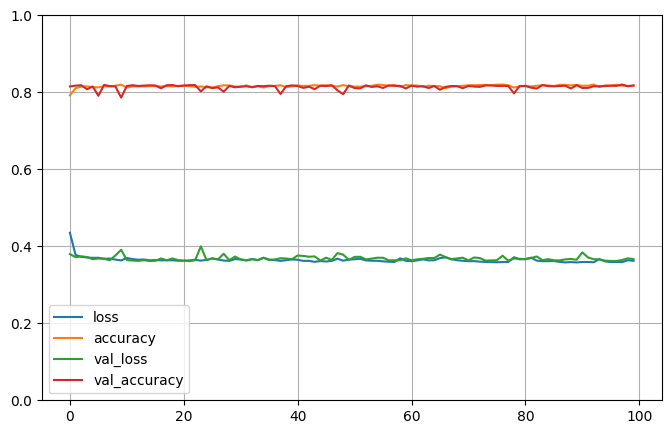

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
model.evaluate(X_test, y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8176


[0.3664516508579254, 0.8175962567329407]

In [9]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

471/471 [==============================] - 1s 1ms/step
0.8175962815405047


# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [10]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

In [11]:
history_normalized = History()
model_normalized = Sequential()
model_normalized.add(Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)))
model_normalized.add(Dense(50, activation="sigmoid"))
model_normalized.add(Dense(10, activation="sigmoid"))
model_normalized.add(Dense(1, activation="sigmoid"))

model_normalized.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [12]:
history_normalized = model.fit(X_train_normalized, y_train, validation_data=(X_test_normalized, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.4223 - accuracy: 0.8156 - val_loss: 0.3365 - val_accuracy: 0.8429
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3261 - accuracy: 0.8471 - val_loss: 0.3309 - val_accuracy: 0.8436
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3219 - accuracy: 0.8492 - val_loss: 0.3284 - val_accuracy: 0.8446
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3188 - accuracy: 0.8515 - val_loss: 0.3280 - val_accuracy: 0.8467
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3166 - accuracy: 0.8514 - val_loss: 0.3281 - val_accuracy: 0.8463
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3142 - accuracy: 0.8534 - val_loss: 0.3261 - val_accuracy: 0.8468
Epoch 7/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3123 - accuracy: 0.8541 - val_loss: 0.3257 - val_accuracy: 0.8463

In [13]:
model_normalized.evaluate(X_test_normalized, y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.7543


[0.6490984559059143, 0.7543160915374756]

In [14]:
y_pred = model.predict(X_test_normalized)
y_pred = (y_pred > 0.5).astype(int)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

471/471 [==============================] - 1s 1ms/step
0.8349269588313413


# Zad. 
Stwórz wykres porównujący metody. 

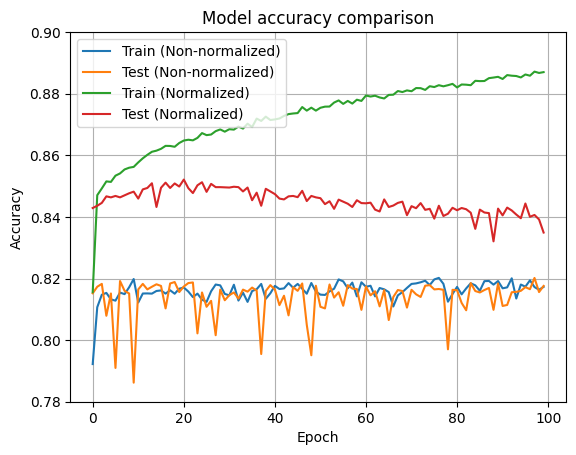

In [21]:
plt.plot(history.history['accuracy'], label='Train (Non-normalized)')
plt.plot(history.history['val_accuracy'], label='Test (Non-normalized)')
plt.plot(history_normalized.history['accuracy'], label='Train (Normalized)')
plt.plot(history_normalized.history['val_accuracy'], label='Test (Normalized)')

plt.title('Model accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0.78, .9) 

plt.show()